# RANDOM PROCESSES

SOME processes in physics are random, like radioactive decay. There are also many other physical processes that are not truly random, but which we can treat as random for all intents and purposes. For instance, Brownian motion is not actually random but we can treat as random

### RANDOM NUMBERS

Technically, in fact, we use pseudorandom numbers, which are not really random at all. 
They only look random.

### RANDOM NUMBER GENERATORS:

Linear congruential random number generator

$$
x^{\prime}=(a x+c) \bmod m
$$

where a, c and m are integer constants and x is an integer variable. Given a value for x, this equation takes that value and turns into a new integer value x'.

Now suppose we take that new value and plug it back in on the righ-hand side of the equation again and get another value. Repeating it for many times, we get a stream of integers.

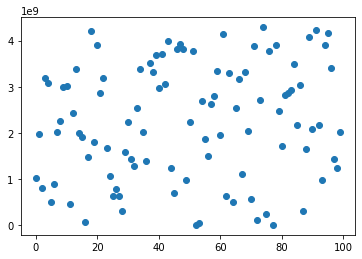

In [3]:
from pylab import plot,show

N = 100
a = 1664525
c = 1013904223
m = 4294967296
x = 2
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
plot(results,"o")
show()

The a linear congruential random number generator, which generates a string of random integers by iterating the same equation for many times. It is the most fundamental way of generating random numbers.

    1, The numbers are not truly random. If you know the values of {a, c, m}, plus the starting values, you can exactly predict the numbers. If you use the same set of parameters, you must get the same values for each run.

    2, The numbers are always positive or zero.

    3, The results are very sensitive to the choice of {a, c, m} values. If c and m were choosen both even, the process would only generate even numbers or only odd numbers. It is wise to use only values which have been thouroughly tested.

    4, For a particular set of {a, c, m}, you can still get different sequence of random numbers by varying the starting number of x. The initial values is called seed for the random number generator.

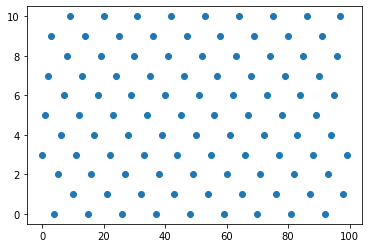

In [6]:
N = 100
a = 4500
c = 1520
m = 11
x = 1 #seed
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
plot(results,"o")
show()

All of Python random number generator functions generate their numbers using the Mersenne Twister algorithm and they are considered good enough for serious physics calculations.

In [10]:
from random import random, randrange
print(random()) #Gives a random floating-point number in the range from zero to one.
print(randrange(10)) #Gives a random integer from 0 to (10-1)
print(randrange(10,100)) # Gives a random integer from 10 to (100-1)
print(randrange(0,100,11)) #Gives a random integer in the range 0 to (100-1) in steps of 11

0.21293444140415818
2
31
99


In [13]:
print(randrange(10))
print(randrange(10))
print(randrange(10))

4
8
4


The function gives a different random number each time. If you want to use the same random number twice in your program for two different things then you will have to store it in a variable so you can come back to it:

In [16]:
z = randrange(10)

The random number is 4
That number again is 4


In [18]:
print("The random number is",z)
print("That number again is",z)

The random number is 4
That number again is 4


In [24]:
from random import randint
print(randint(1,6))  #Gives a random integer from 1 to 6

1


In [25]:
print(randint(1,6))

6


In [27]:
from numpy import random
print(random.randint(1,7,10)) #Gives 10 random integer from 1 to (7-1)

[2 4 1 6 4 2 4 3 6 6]


#### Two Rolling dice

a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.

b) Modify your program to simulate the rolling of two dice a million times and count the number of times you get a double six. Divide by a million to get the fraction of times you get a double six. You should get something close to, though probably not exactly equal to 1/36

In [41]:
from random import randint

a = randint(1,6)
b = randint(1,6)
print(a,b)

count = 0
for i in range(1000000):
    a = randint(1,6)
    b = randint(1,6)
    if a==6 and b==6:
        count+=1

probability = count/1e6
print('The observed propability for rolling dice is ',probability)

1 4
The observed propability for rolling dice is  0.027956


### Random Number Seeds

As we saw in the above case, a random number generator can have a seed, which is an input value that tells the generator where to start its sequence. In order to start the random number generator differently every time, one needs to have a systematic way of obtaning a different initial seed. Otherwise, one would end up with exactly the same result if one starts the program with exactly the same initial seed. Almost every computer has intrisic function routines to report the current time in an integer form. For example, one could use the timestamp here.

year:   0<=iy<=99

month:  1<=im<=12

day:    1<=id<=31

hour:   0<=ih<=23

minute: 0<=in<=59

second: 0<=is<=59

Then one can choose

I_seed = iy + 70(im + 12{id + 31[ih + 23(in + 59is)]})

as the initial seed, which is roughly in the region of $[0, 2^{31}-1]$. The results should never be the same within 100 years. This is also how the random seeds are generated in the current computer.

On the other hand, the fixed random seeds could be very convenient when one wants to debug a code which contains some part of random number generation. In the case, you just need to insert some fixed seed number which ensure that you always get the consistent numbers.

In [32]:
from random import randrange,seed
seed(30)
for i in range(4):
    print(randrange(10))

8
4
9
0


If you do not use a seed, if you just start generating random numbers right off the bat without using the seed function, then the random number generator will start at a different random point each time you run your program and generate a different sequence of numbers. When you are working with random programs one of the most frustrating things is that you run the program once and something goes wrong, but then you run it again, without changing anything in the program, and everything works fine. This kind of behavior can make it hard to track
down problems. Seeding the random number generator gets around this problem.

### PROBABILITIES AND BIASED COINS

It happens frequently when writing computer programs for physics calculations that you want some event to take 
place randomly with probability p. This kind of behavior often is called the "toss of a biased coin" 
by statisticians.

In [36]:
from random import random
if random() < 0.2:
    print("Heads")
else:
    print("Tails")

Heads


#### DECAY OF AN ISOTOPE

The radioisotope 208 Tl (thallium 208) decays to stable 208 Pb (lead 208) with a
half-life of 3.053 minutes. Suppose we start with a sample of 1000 thallium
atoms. Let us simulate the decay of these atoms over time, mimicking the
randomness of that decay using random numbers. On average we know that the number 
N of atoms in our sample will fall off exponentially over time according to the 
standard equation of radioactive decay:

$$
N(t)=N(0) 2^{-t / \tau}
$$

where $\tau$ 
 is the half-life. Then the fraction of atoms remaining after time $t$ is
$
N(t)/N(0)=2^{-t / \tau}
$ 
and the fraction that have decayed, which is also equal to
the probability p(t) that any particular single atom has decayed, is one minus
this number, or

$$
p(t)=1-2^{-t / \tau}
$$

Thus this number represents the probability that a single atom decays in a time
interval of length t.
We will simulate the decay of our sample of 1000 atoms by dividing the
atoms into two sets, one of thallium and one of lead. Initially all the atoms are
in the thallium set. We will divide time into time-steps of 1 second each and
in each time-step we will consider in tum each thallium atom and with the
probability given by $p(t)$ decide whether or not it decays. In this way we
work out the total number of thallium atoms that decay in each second, then
we subtract this number from the total in the thallium set and add it to the total
in the lead set.
Here's a program to perform the calculation and make a plot of the number
of atoms of each type as a function of time for 1000 seconds:

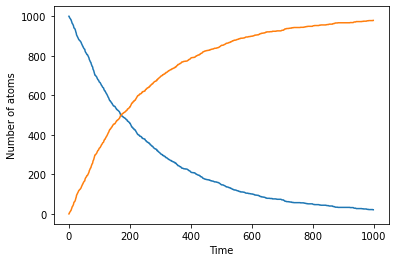

In [30]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random() < p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time")
ylabel("Number of atoms")
show()

### NONUNIFORM RANDOM NUMBERS


As shown in the above, the probability that a atom decays in time $t$ is $1-2^{-t/\tau}$, and hence the probability that it decays in a time interval $dt$ is
$$1-2^{-dt/\tau} = 1-\exp(-\frac{dt}{\tau}\text{ln}2) = \frac{\text{ln}2}{\tau}dt$$

Then we calculate the total probability of decaying an atom between $t$ and $t+dt$. In order to undergo such a decay,
an atom must survive without decay until time $t$, which happens with $p=2^{-t/\tau}$, and then decay in dt interval:

$$P(t)dt = 2^{-t/\tau}\frac{\text{ln}2}{\tau}dt$$

This is an example of non-uniform probability distribution. The decay times t are distributed in proportion to $2^{-t/\tau}$, 
so that ealier decay times are more probable than late ones.

A more efficient way to calculate the decay of a sample is to generate N random numbers from this non-uniform probability distribution, to represent the time at which each of the atom decays. Then creating curves as a function of time, is simply a matter of counting how many of the atoms decay before any given time.

It is possible to generate non-uniform random numbers from a wide range of different distributions, including the exponential distribution, using the previous method. If you already have a source of uniform random numbers, one could turn them into nonuniform ones using some `transformation methods`.

Suppose you have a source of random floating numbers z from a distribution with a probability (q(z)=1). And supposed that you have a function x(z). Then when z is one of our random numbers, x(z) is also a random number, but it will have different distribution according to x(z). 

$$p(x)dx = q(z)dz$$
$$\int_{-\infty}^{x(z)} p(x')dx' = \int_0^z dz'=z$$

As an example, suppose we want to integrate random real numbers x in the interval from zero to infinity with the exponential probability distribution

$$p(x)=\mu e^{-\mu x}$$

The leading factor of $\mu$ is necessary to make the distribution properly normalized. This is the same distribution that in the radioactive decay problem above, where $\mu=\text{ln}2/\tau$.

For this distribution,
$$\mu \int_0^{x(z)} e^{-\mu x'} dx' = 1-e^{-\mu x} = z$$

Therefore,

$$x = -\frac{1}{\mu}\text{ln}(1-z)$$

So all we need is to generate uniform random numbers z in the interval from zero to one and feed them into this equation to get exponentially distributed x values.

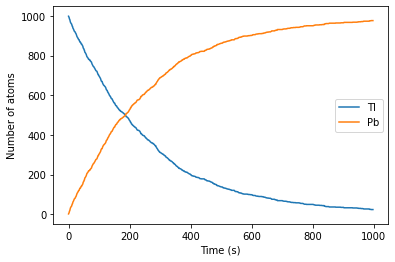

In [17]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

NTl = 1000           # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
mu = np.log(2)/tau
tmax = 1000   

Pbpoints = np.zeros([NTl-1])  #the array to store the number of decayed atoms in each time step 
Tlpoints = NTl * np.ones([NTl-1])  #the array to store the number of decayed atoms in each time step 

for i in range(NTl):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<tmax:     
        Pbpoints[x0:] += 1  #after decay, we need to count 1 from now on
        Tlpoints[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(Tlpoints, label='Tl')
plt.plot(Pbpoints, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()